In [190]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import lightgbm as lgb
from sklearn.model_selection import KFold
import warnings
import gc
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn import metrics

plt.style.use('seaborn')
pd.set_option('display.max_columns', 100)

In [191]:
# Loading dataset

In [192]:
data_1 = pd.read_csv('data_1.csv')

In [193]:
data_1 = data_1[['V1','V2']]

In [194]:
data = data_1.iloc[1:,:]# = 
data.columns = data_1.iloc[0]

In [195]:
data = data.astype(float)

In [196]:
#Observing data

In [197]:
data.head(10)

,density,gain
1,0.686,17.6
2,0.686,17.3
3,0.686,16.9
4,0.686,16.2
5,0.686,17.1
6,0.686,18.5
7,0.686,18.7
8,0.686,17.4
9,0.686,18.6
10,0.686,16.8


In [198]:
# Scenario 1, Fitting

In [199]:
#Use the data to fit the gain,or a transformation of gain,to density.

#Try sketching the least squares line on a scatter plot.

In [200]:
# least square line and scatter plot of original data

Text(0.5,1,'Density vs. Gain')

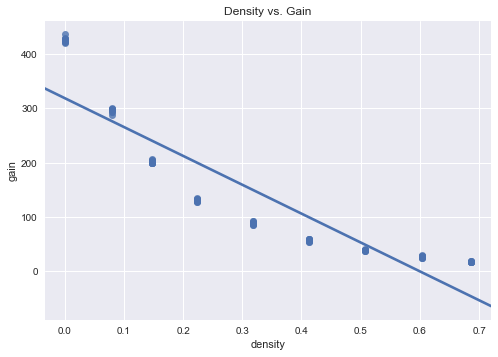

In [201]:
sns.regplot(data.density, data.gain, ci = None)
plt.title('Density vs. Gain')

In [202]:
# least square line and scatter plot of original data of log transformation

In [203]:
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf

In [204]:
# Least Absolute Devidations Regression Line

In [205]:
data = data.assign(logy = np.log(data.gain))

In [206]:
mod = smf.quantreg('logy ~ density', data)
res = mod.fit(q=.5)

In [207]:
ladr_slope,ladr_intercept  = res.params['density'], res.params['Intercept']

In [208]:
-.01 * ladr_slope + ladr_intercept

6.048274418346464

In [231]:
temp = data.groupby('density').gain.apply(lambda x: np.log(x.mean())).to_frame().reset_index()#.plot(kind = 'scatter', x = 'density', y = 'gain')

In [232]:
temp

,density,gain
0,0.001,6.056081
1,0.080,5.690697
2,0.148,5.305293
3,0.223,4.872139
4,0.318,4.482890
5,0.412,4.039888
6,0.508,3.651956
7,0.604,3.293241
8,0.686,2.862772


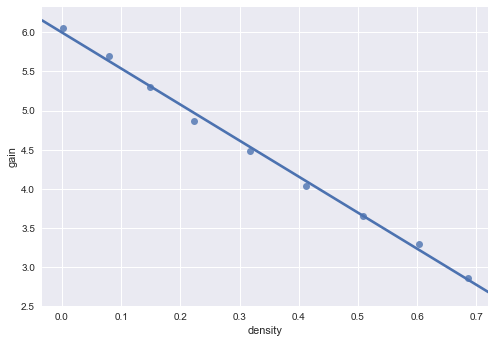

In [233]:
sns.regplot(temp.density, temp.gain, ci = None, label = 'Least Square Regression Line')

Text(0.5,1,'Density vs. Gain')

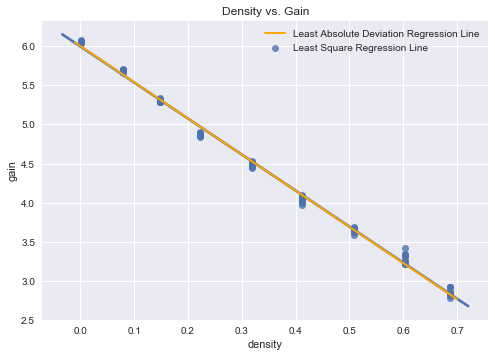

In [209]:
sns.regplot(data.density, np.log(data.gain), ci = None, label = 'Least Square Regression Line')
plt.plot([-.01, .7],[6.048274418346464, 2.767203339754841],linewidth=2, label = 'Least Absolute Deviation Regression Line', color = 'orange')
plt.legend()
plt.title('Density vs. Gain')

In [210]:
# Get the parameter of least square line
from scipy import stats

In [71]:
#least square line of original data
stats.linregress(data.density, data.gain)

LinregressResult(slope=-531.9507135085527, intercept=318.70145847283186, rvalue=-0.9031596703485595, pvalue=4.518580918276382e-34, stderr=26.954499112917436)

In [72]:
#least square line of log-transformed data
stats.linregress(data.density, np.log(data.gain))

LinregressResult(slope=-4.605936903053419, intercept=5.997265499197896, rvalue=-0.9979069608362691, pvalue=1.8572471194586542e-106, stderr=0.031817269275284187)

In [76]:
#Least Absolute Deviations Regression Line
print("slope = {}".format(ladr_slope))
print("intercept = {}".format(ladr_intercept))

slope = -4.621226871255808
intercept = 6.002062149633907


In [77]:
slope = stats.linregress(data.density, np.log(data.gain))[0]
intercept = stats.linregress(data.density, np.log(data.gain))[1]

In [78]:
pred = data.density * slope + intercept

In [79]:
residuals = np.log(data.gain) - pred
#residuals = np.exp(residuals)

Text(0.5,1,'Residuals of Least Squares Regression Line (Log transformed)')

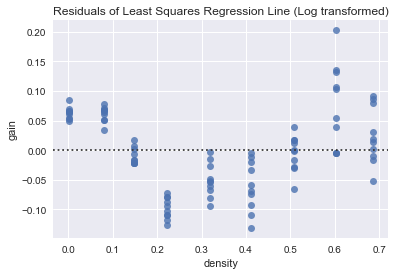

In [94]:
sns.residplot(data.density, np.log(data.gain))
plt.title('Residuals of Least Squares Regression Line (Log transformed)')

In [88]:
pred_ladr = data.density *ladr_slope + ladr_intercept
residuals_ladr = np.log(data.gain) - pred_ladr

Text(0.5,1,'Residuals of Least Absolute Deviations Regression Line (Log transformed)')

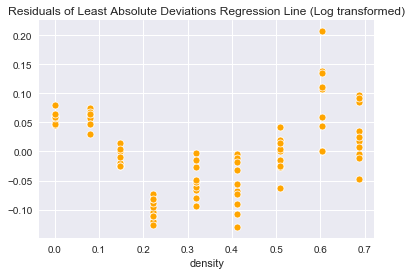

In [97]:
sns.scatterplot(data.density, residuals_ladr, color = 'orange')
plt.title('Residuals of Least Absolute Deviations Regression Line (Log transformed)')

Text(0.5,1,'Histogram of Residuals of Least Squares Regresion Line')

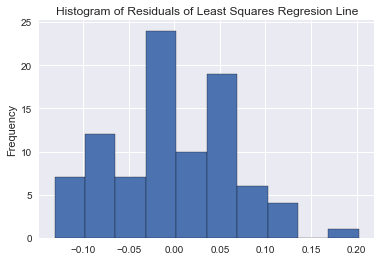

In [81]:
residuals.plot(kind = 'hist', edgecolor = 'k')
plt.title('Histogram of Residuals of Least Squares Regresion Line')

Text(0.5,1,'Histogram of Residuals of Least Absolute Deviations Regression Line')

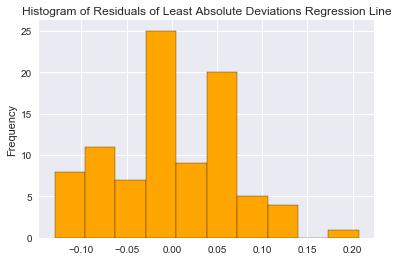

In [100]:
residuals_ladr.plot(kind = 'hist', edgecolor = 'k', color = 'orange')
plt.title('Histogram of Residuals of Least Absolute Deviations Regression Line')

In [102]:
import statsmodels.api as sm

In [104]:
# QQ plot of residuals of Least Squares Regresion Line

Text(0.5,1,'QQ plot of residuals of Least Squares Regresion Line')

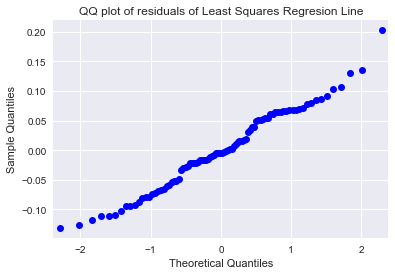

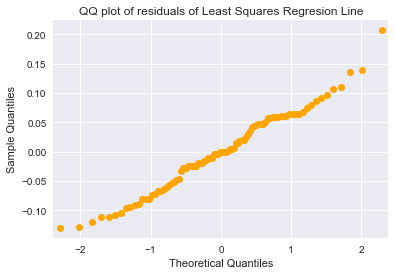

In [112]:
sm.qqplot(residuals, color = 'blue')
plt.title('QQ plot of residuals of Least Squares Regresion Line')
sm.qqplot(residuals_ladr, color = 'orange')
plt.title('QQ plot of residuals of Least Squares Regresion Line')

In [118]:
#Scenario 2, Predicting
a = 38.6 
b = 426.7

In [124]:
0.508, 0.001

(0.508, 0.001)

In [125]:
#Least Square

In [131]:
lse = stats.linregress(np.log(data.gain),data.density)

In [132]:
lse

LinregressResult(slope=-0.2162032010958118, intercept=1.2980126052584202, rvalue=-0.9979069608362691, pvalue=1.8572471194586542e-106, stderr=0.0014935062316818886)

In [149]:
mod = smf.quantreg('density ~ logy', data)
res = mod.fit(q=.5)

In [155]:
#ls pred of a
pred = lse[0] * np.log(a) + lse[1]
pred

0.5081677686748749

In [156]:
#ladr pred
pred_ladr = res.params['logy'] * np.log(a) + res.params['Intercept']
pred_ladr

0.5079512954825337

In [172]:
#CI of ls pred, assume known variance
se = 1.96*lse[4]
pred - se, pred + se

(0.5052404964607784, 0.5110950408889714)

In [183]:
#CI of ladr pred, assume known variance
np.log(a)*res.conf_int(.05).iloc[1,0]+res.conf_int(.05).iloc[0,0],\
np.log(a)*res.conf_int(.05).iloc[1,1]+res.conf_int(.05).iloc[0,1]

(0.4723137638111201, 0.5435888271539473)

In [185]:
#ls pred of b
pred = lse[0] * np.log(b) + lse[1]
pred

-0.011331534157646539

In [186]:
#ladr pred of b
pred_ladr = res.params['logy'] * np.log(b) + res.params['Intercept']
pred_ladr

-0.0100280156894339

In [187]:
#CI of ls pred of b, assume known variance
se = 1.96*lse[4]
pred - se, pred + se

(-0.014258806371743041, -0.008404261943550036)

In [188]:
#CI of ladr pred, assume known variance
np.log(b)*res.conf_int(.05).iloc[1,0]+res.conf_int(.05).iloc[0,0],\
np.log(b)*res.conf_int(.05).iloc[1,1]+res.conf_int(.05).iloc[0,1]

(-0.05605204000147368, 0.0359960086226061)

In [234]:
# CI 我不确定

In [270]:
# Scenario 3

In [279]:
data = data[['density','gain']]

In [280]:
train = data[data.density!=0.508]
test = data[data.density == 0.508]

In [282]:
lse_inverse = stats.linregress(np.log(train.gain),train.density)

In [283]:
lse_inverse

LinregressResult(slope=-0.21627808679336213, intercept=1.2984221228853379, rvalue=-0.9977772794097106, pvalue=1.6043117188534927e-93, stderr=0.00163548881591148)

In [ ]:
pred = 38.6 lse_inverse